In [182]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [183]:
#coordonnée de la personne 1
x1 = 30
y1 = 50
pos1 = np.array((x1,y1))

x2 = 15
y2 = 60
pos2 = np.array((x2,y2))

#coordonnée de sortie
sx1 = 0
sy1 = 0
sx2 = 30
sy2 = 0
sortie1 = np.array((sx1,sy1))
sortie2 = np.array((sx2,sy2))
sorties = np.array((sortie1,sortie2))

#vitesse de mouvement de la personne
v = 1.5 #m/s

#temps
dt = 1
tmax = 15

In [184]:
def sortiePlusProche(pos,sorties):
    #retourne l'indice de la sortie plus proche
    d = np.linalg.norm(sorties - pos, axis=1)
    return np.argmin(d)
        
#s_pos1 = sortiePlusProche(pos1,sortie)
#s_pos2 = sortiePlusProche(pos2,sortie)


def direction(pos,sorties):
    indice_sortie = sortiePlusProche(pos,sorties)
    d = sorties[indice_sortie] - pos
    norm = np.linalg.norm(d)
    return d / norm if norm != 0 else 0


def step(pos,sorties,v,dt): 
    #indice_sortie = sortiePlusProche(pos,sorties)
    dir = direction(pos,sorties)
    return v*dt*dir
    


def generer_people(nb,x_max,y_max):
    people = np.empty((nb,5), dtype=object)
    for i in range(nb):
        #générer aléatoirement les coordonnées des x et des y
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        
        #générer aléatoirement le niveau de perception(faible ou élevé)
        niveau_perception = random.choice(['faible','élevé'])
        
        #générer aléatoirement la vitesse en fonction du niveau de perception
        if niveau_perception == 'faible':
            vitesse = np.round(random.uniform(0.8, 1.4),1) #vitesse faible
        else:
            vitesse = np.round(random.uniform(1.5, 2.0),1) #vitesse élevéé

        people[i, 0] = i  # Numéro d'identification
        people[i, 1] = x  # Coordonnée x
        people[i, 2] = y  # Coordonnée y
        people[i, 3] = niveau_perception  # Niveau de perception
        people[i, 4] = vitesse  # Vitesse
        
    return people
#x_max, y_max = dimension de l'espace


In [185]:
def step_people(people,sorties,dt,t_max):
    temps = np.arange(0,t_max+dt,dt)
    n_step=len(temps) # Nombre de pas
    res = np.empty((n_step, len(people), 5), dtype=object)
    res[0]=people
    for i in range(n_step-1):
        for j in range(len(people)):
            pos = np.array((res[i, j, 1], res[i, j, 2]))  # Position actuelle de la personne
            v = res[i, j, 4]  # Vitesse individuelle de la personne j
            new_step = step(pos, sorties, v, dt)  # Nouveau déplacement de la personne
            
            # Mettre à jour les positions x et y de la personne
            res[i + 1, j, 1] = res[i, j, 1] + new_step[0]  # Nouvelle position x
            res[i + 1, j, 2] = res[i, j, 2] + new_step[1]  # Nouvelle position y
            # Mettre à jour le niveau de perception et la vitesse de la personne
            res[i + 1, j, 0] = res[i, j, 0]  # Numéro d'identification inchangé
            res[i + 1, j, 3] = res[i, j, 3]  # Niveau de perception inchangé
            res[i + 1, j, 4] = res[i, j, 4]  # Vitesse inchangée
    return res

In [186]:
def evacuation(liste_step, sorties):
    #retourne une liste de numéros des individus évacués
    evacuated = []  # Liste pour suivre les individus évacués
    people = liste_step[-1]
    for person in liste_step[-1]:
        pos = np.array([person[1], person[2]])
        x = pos[0]
        y = pos[1]
        sortie = sorties[sortiePlusProche(pos,sorties)]

        # Vérifier si la personne a atteint la sortie
        if np.linalg.norm(sortie - pos) < 1:
            evacuated.append(person[0])

    # Retirer les individus évacués de la liste_step
    people = [person for person in liste_step[-1] if person[0] not in evacuated] # Liste des individus non évacués

    # Si tous les individus sont évacués, arrêter la simulation
    if len(people) == 0:
        print("Tous les individus sont évacués")
    # Si au moins un individu qui n'est pas évacués, arrêter la simulation
    else :
        print("Nombre d'individus évacués:", len(evacuated), "Nombre d'individus non évacués:", len(people))
    
    return evacuated
        

Nombre d'individus évacués: 4 Nombre d'individus non évacués: 1
[[0 31 23 'élevé' 1.5]
 [1 40 56 'élevé' 1.5]
 [2 9 11 'faible' 1.0]
 [3 44 16 'faible' 1.3]
 [4 0 15 'faible' 1.2]]
[[[0 31 23 'élevé' 1.5]
  [1 40 56 'élevé' 1.5]
  [2 9 11 'faible' 1.0]
  [3 44 16 'faible' 1.3]
  [4 0 15 'faible' 1.2]]

 [[0 30.934844163585538 21.50141576246741 'élevé' 1.5]
  [1 39.736314042274515 54.52335863673728 'élevé' 1.5]
  [2 8.366762209742737 10.226042700796679 'faible' 1.0]
  [3 43.14394400977093 15.02165029688106 'faible' 1.3]
  [4 0.0 13.8 'faible' 1.2]]

 [[0 30.869688327171076 20.00283152493482 'élevé' 1.5]
  [1 39.47262808454903 53.046717273474556 'élevé' 1.5]
  [2 7.733524419485474 9.452085401593358 'faible' 1.0]
  [3 42.28788801954185 14.043300593762119 'faible' 1.3]
  [4 0.0 12.600000000000001 'faible' 1.2]]

 [[0 30.804532490756618 18.50424728740223 'élevé' 1.5]
  [1 39.208942126823544 51.570075910211834 'élevé' 1.5]
  [2 7.100286629228211 8.678128102390037 'faible' 1.0]
  [3 41.431832

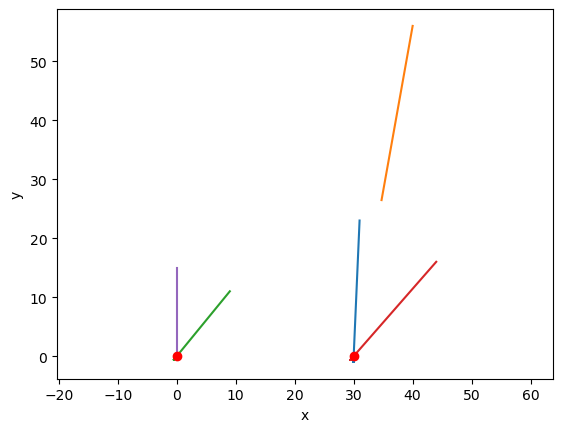

In [188]:
nb_pers = 5
x_max = 60
y_max = 60
dt = 1
tmax = 20

people = generer_people(nb_pers,x_max,y_max)
liste_step = step_people(people,sorties,dt,tmax)
evacuated = evacuation(liste_step,sorties)

print(people)
print(liste_step)
print(evacuated)


def plot_xy(nb_pers,liste_step):
    pos_x = []
    pos_y = []
    res_x = []
    for i in range(nb_pers):
        pos_x = liste_step[:,i,1]
        pos_y = liste_step[:,i,2]
        plt.plot(pos_x,pos_y)
    plt.axis("equal")


#plot personnes
plot = plot_xy(nb_pers,liste_step)

#plot sortie
plt.plot(sorties[0][0],sorties[0][1],"ro")
plt.plot(sorties[1][0],sorties[1][1],"ro")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:
#testtttttttttttttt
def generer_people(nb,x_max,y_max):
    people = np.zeros((nb,2))
    for i in range(nb):
        x = random.randint(0,x_max)
        y = random.randint(0,y_max)
        people[i, 0] = x
        people[i, 1] = y
    # people = np.random.rand((nb, 2))
    # people[:, 0] *= x_max
    # people[:, 1] *= y_max
    return people

print(generer_people(10,60,60))

def positions_individu(pos,sortie,v,dt,t_max):
    p = pos
    res = [p]
    t = 0
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        res.append(p)
        t = t + dt
    return res

[[42.  8.]
 [54. 25.]
 [58. 55.]
 [23. 59.]
 [18. 46.]
 [ 7. 12.]
 [ 4. 17.]
 [48. 51.]
 [58. 25.]
 [54. 36.]]


In [4]:
#obstacle
obs_a = np.array((25,25)) 
obs_b = np.array((35,25))

def positions_obstacle(point_a,point_b,delta_d):
    #ensemble des points d'un obstacle
    #delta_d = distance entre chaque points
    point = point_a
    l_obs = [point]
    dir = direction(point_a,point_b)
    
    d_max = point_b- point_a
    d_max = np.sqrt(d_max[0]**2+d_max[1]**2)
    d = 0
    
    while (d < d_max):
        point = point + dir * delta_d
        l_obs.append(point)
        d = d + delta_d
    return l_obs

obstacle = positions_obstacle(obs_a,obs_b,0.1) #liste des coord des points d'un obstacle
obs_x = [i[0] for i in obstacle]
obs_y = [i[1] for i in obstacle]
print(obstacle)

[array([25, 25]), array([25.1, 25. ]), array([25.2, 25. ]), array([25.3, 25. ]), array([25.4, 25. ]), array([25.5, 25. ]), array([25.6, 25. ]), array([25.7, 25. ]), array([25.8, 25. ]), array([25.9, 25. ]), array([26., 25.]), array([26.1, 25. ]), array([26.2, 25. ]), array([26.3, 25. ]), array([26.4, 25. ]), array([26.5, 25. ]), array([26.6, 25. ]), array([26.7, 25. ]), array([26.8, 25. ]), array([26.9, 25. ]), array([27., 25.]), array([27.1, 25. ]), array([27.2, 25. ]), array([27.3, 25. ]), array([27.4, 25. ]), array([27.5, 25. ]), array([27.6, 25. ]), array([27.7, 25. ]), array([27.8, 25. ]), array([27.9, 25. ]), array([28., 25.]), array([28.1, 25. ]), array([28.2, 25. ]), array([28.3, 25. ]), array([28.4, 25. ]), array([28.5, 25. ]), array([28.6, 25. ]), array([28.7, 25. ]), array([28.8, 25. ]), array([28.9, 25. ]), array([29., 25.]), array([29.1, 25. ]), array([29.2, 25. ]), array([29.3, 25. ]), array([29.4, 25. ]), array([29.5, 25. ]), array([29.6, 25. ]), array([29.7, 25. ]), arr

In [5]:
directions = np.array(((1,0),(-1,0),(0,1),(0,-1)))
coord = np.array((20,30))
coord2 = coord+v*dt*directions[0]
print(coord)
print(coord2)

[20 30]
[21.5 30. ]


In [6]:
def deplace_vers(coord,obstacle,v,dt):
    #coord : coord actuel de la personne
    #obstacle : liste des points
    liste_direction = np.array(((1,0),(-1,0),(0,1),(0,-1))) #droite,gauche,hau,bas
    for i in liste_direction:
        p = coord + v*dt*i #le prochain coord de la personne
        if p not in obstacle :
            return p


coord = np.array((20,30))
print(coord+v*dt*directions[0])
deplace_vers(coord,obstacle,v,dt)
        

def positions_individu(pos,sortie,obstacle,v,dt,t_max):
    res = []
    t = 0
    p = pos
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        if p not in obstacle:
            res.append(p)
        else:
            p = deplace_vers(p,obstacle,v,dt)
        t = t + dt
    return res

[21.5 30. ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()